In [268]:
using Jacobi
using PyPlot
include("../src/HPFEM.jl");

In [269]:
M = 10
Q = M
lagr = HPFEM.Lagrange1d(M);
quad = HPFEM.QuadType(Q);
base = HPFEM.Basis1d(lagr, quad);

In [270]:
elemento = HPFEM.Element1d(1, -1.0, 1.0, base);
Mass = HPFEM.mass_matrix(base, elemento);



In [271]:
fun(x) = sin(2*pi*x)
x = linspace(-1,1,101)
#plot(x,fun(x));

In [272]:
Fe = zeros(Q)
fe = fun(elemento.ξ)
HPFEM.add_rhs!(base, elemento, fe, Fe)
uh = Mass\Fe
#plot(uh)
uh - fe


10-element Array{Float64,1}:
  0.0        
  5.55112e-17
  0.0        
  0.0        
 -1.11022e-16
  1.11022e-16
  0.0        
  0.0        
 -5.55112e-17
  0.0        

In [273]:
Q2 = 101
x =linspace(-1,1,Q2)

linspace(-1.0,1.0,101)

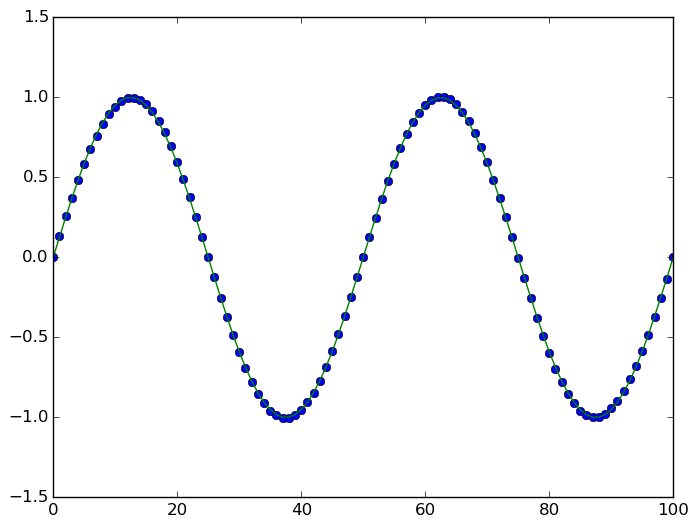

0.01117006263826592

In [274]:
#u = zeros(Q)
test = zeros(101,M)
for i in 1 :Q
    test[:,i] = base(x,i)
end
plot(test*uh,"o")
plot(fun(x))
maxabs(test*uh - fun(x))